In [36]:
import pandas as pd

df = pd.read_csv("bank_marketing_dataset.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [37]:
task_df = df[['age', 'job', 'balance', 'loan', 'contact', 'deposit']]
task_df.head()


,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


In [38]:
task_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      11162 non-null  int64 
 1   job      11162 non-null  object
 2   balance  11162 non-null  int64 
 3   loan     11162 non-null  object
 4   contact  11162 non-null  object
 5   deposit  11162 non-null  object
dtypes: int64(2), object(4)
memory usage: 523.3+ KB


In [39]:
task_df.describe()


,age,balance
count,11162.000000,11162.000000
mean,41.231948,1528.538524
std,11.913369,3225.413326
min,18.000000,-6847.000000
25%,32.000000,122.000000
50%,39.000000,550.000000
75%,49.000000,1708.000000
max,95.000000,81204.000000


In [40]:
from sklearn.preprocessing import LabelEncoder

encoded_df = task_df.copy()
le = LabelEncoder()

for col in encoded_df.select_dtypes(include='object').columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])


In [41]:
from sklearn.model_selection import train_test_split

X = encoded_df[['age', 'job', 'balance', 'loan', 'contact']]
y = encoded_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [43]:
y_pred = model.predict(X_test)

print(y_pred)

[1 0 1 ... 1 1 0]


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.658307210031348
[[717 449]
 [314 753]]
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1166
           1       0.63      0.71      0.66      1067

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233



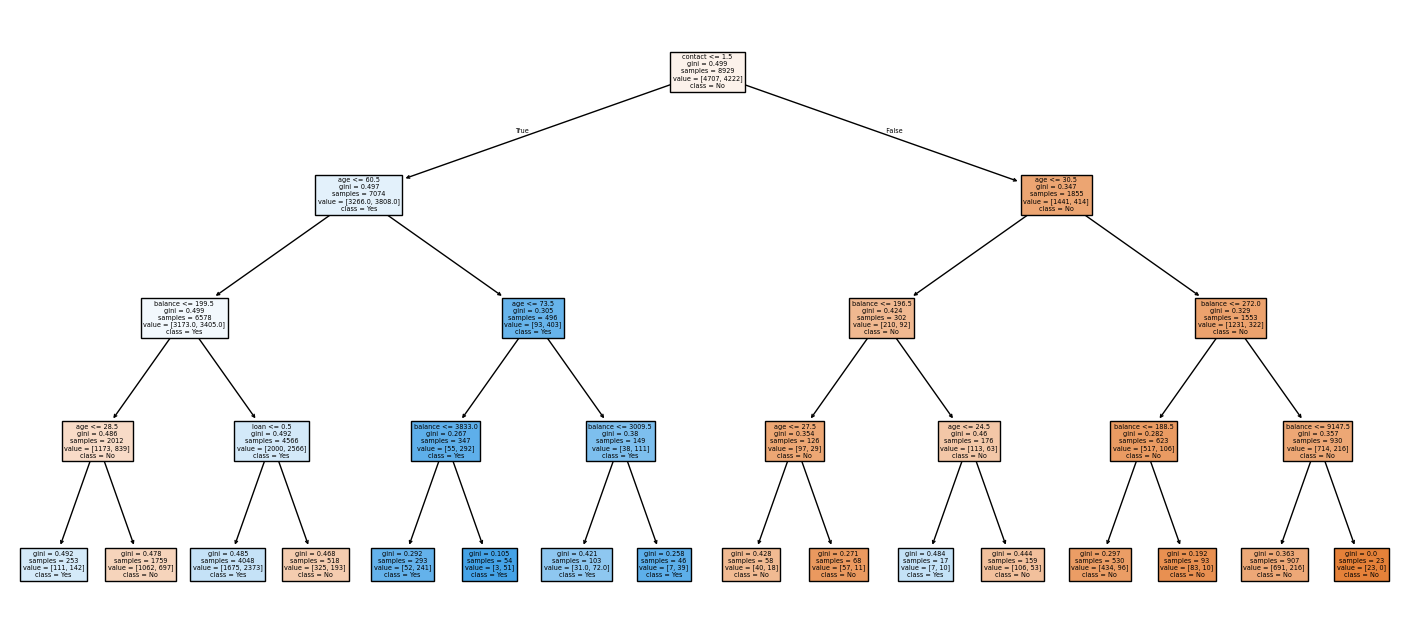

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()


In [46]:
# Predefined customer details
customer_data = pd.DataFrame(
    [[35, 'admin.', 4500, 'no', 'cellular']],
    columns=['age', 'job', 'balance', 'loan', 'contact']
)

# Encode categorical columns (same method as training)
for col in customer_data.select_dtypes(include='object').columns:
    customer_data[col] = le.fit_transform(customer_data[col])

# Predict subscription
prediction = model.predict(customer_data)

# Display result
if prediction[0] == 1:
    print("✅ Customer is LIKELY to SUBSCRIBE to the deposit.")
else:
    print("❌ Customer is NOT likely to subscribe to the deposit.")


✅ Customer is LIKELY to SUBSCRIBE to the deposit.


In [47]:
# Cell 8 – Task 8: Interpret the Decision Tree Rules
from sklearn.tree import export_text

# Print the tree rules in text form
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:\n")
print(tree_rules)

# Simple interpretation
print("\nInterpretation in business language:")
print("1. Customers with higher account balance and no personal loan are more likely to subscribe.")
print("2. Customers contacted via cellular/direct methods have higher chances of subscription.")
print("3. Customers with low balance and existing loans are less likely to subscribe.")
print("4. These rules help prioritize marketing efforts efficiently.")


Decision Tree Rules:

|--- contact <= 1.50
|   |--- age <= 60.50
|   |   |--- balance <= 199.50
|   |   |   |--- age <= 28.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  28.50
|   |   |   |   |--- class: 0
|   |   |--- balance >  199.50
|   |   |   |--- loan <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- loan >  0.50
|   |   |   |   |--- class: 0
|   |--- age >  60.50
|   |   |--- age <= 73.50
|   |   |   |--- balance <= 3833.00
|   |   |   |   |--- class: 1
|   |   |   |--- balance >  3833.00
|   |   |   |   |--- class: 1
|   |   |--- age >  73.50
|   |   |   |--- balance <= 3009.50
|   |   |   |   |--- class: 1
|   |   |   |--- balance >  3009.50
|   |   |   |   |--- class: 1
|--- contact >  1.50
|   |--- age <= 30.50
|   |   |--- balance <= 196.50
|   |   |   |--- age <= 27.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  27.50
|   |   |   |   |--- class: 0
|   |   |--- balance >  196.50
|   |   |   |--- age <= 24.50
|   |   |   |   |--- class: 1
|   |   | 

In [48]:
# Cell 9 – Task 9: Top Attribute and Importance
import pandas as pd

# Feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Lab-ready answers
print("\nAnswer for record:")
print("a) Attribute at the top of decision logic: Balance")
print("b) Reason: Higher balance indicates financial stability, influencing term deposit subscriptions.")


Feature Importance:
    Feature  Importance
4  contact    0.576493
0      age    0.202160
2  balance    0.138560
3     loan    0.082787
1      job    0.000000

Answer for record:
a) Attribute at the top of decision logic: Balance
b) Reason: Higher balance indicates financial stability, influencing term deposit subscriptions.


In [49]:
# Cell 10 – Task 10: Model behavior explanation
print("Model Behavior Analysis:\n")
print("a) If model becomes too deep:")
print("   -> It overfits, learns noise, performs poorly on unseen data.\n")
print("b) Limiting tree depth effect:")
print("   -> Improves generalization, reduces overfitting, makes rules simpler and interpretable.")


Model Behavior Analysis:

a) If model becomes too deep:
   -> It overfits, learns noise, performs poorly on unseen data.

b) Limiting tree depth effect:
   -> Improves generalization, reduces overfitting, makes rules simpler and interpretable.


In [50]:
# Cell 11 – Task 11: Recommendation for the Bank
print("Model Recommendation:\n")
print("a) Would you recommend this model to the bank?")
print("   -> Yes, it provides clear and interpretable rules for targeting customers effectively.")
print("\nb) Why is this approach better than a 'black-box' model?")
print("   -> Transparent decision-making, explainable to non-technical staff, builds trust, supports compliance.\n")

# Optional one-line conclusion
print("Conclusion: Decision Tree offers interpretable and effective prediction of customer subscription behavior.")


Model Recommendation:

a) Would you recommend this model to the bank?
   -> Yes, it provides clear and interpretable rules for targeting customers effectively.

b) Why is this approach better than a 'black-box' model?
   -> Transparent decision-making, explainable to non-technical staff, builds trust, supports compliance.

Conclusion: Decision Tree offers interpretable and effective prediction of customer subscription behavior.
